<a href="https://colab.research.google.com/github/sangamtiruwa/python/blob/master/Sangam_ASS1_PremierLeague25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





# Assignment 1 - Premier league
## Contents
- 1 Getting started
- 2 Concatenating two dataframes
- 3 What is the data about
- 4 Exploring a little
- 5 Grouping the data by team
- 6 Histogram about goals per game
- 7 Barplot about total goals per team
- 8 Stacked Barplot of Home vs Away Goals per Team
- 9 Freestyling and feedback



In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



## 1 Getting started


Rename this notebook: "1_yourname".

Copy the Excel-file provided for this assignment (football_18-19.xlsx) to your own Gdrive.

Mount the drive and copy the path.

Import the Excel-file.  

What are the names of the sheets in the Excel-file (method **.sheet_names**)

Form first two separate dataframes (df18, df19) for years 2018 and 2019 (method **.parse()**).

Explore the basic features of the dataframes for example with methods **.info()**, **.describe()**, **.head()** and attributes **.shape** and **.columns**

Explain the main features of the data in your own words, using what you learned from the previous questions."


In [36]:
import pandas as pd
path='/content/drive/MyDrive/football_18-19 (1).xlsx'


In [37]:
import pandas as pd

# Load the Excel file
xls = pd.ExcelFile('/content/drive/MyDrive/football_18-19 (1).xlsx')

# Print sheet names
print(xls.sheet_names)


['League18', 'League19', 'Sheet1']


**Answer**= The names of the sheets in the Excel file are: League18,League19 and Sheet1.

In [38]:
df18 = xls.parse('League18')
df19 = xls.parse('League19')


In [39]:
# Explore df18 (2018 season)
print("=== League18 DataFrame ===")
df18.info()
print("\nShape:", df18.shape)
print("\nColumns:", df18.columns)
print("\nHead:\n", df18.head())
print("\nDescription:\n", df18.describe())

# Explore df19 (2019 season)
print("\n\n=== League19 DataFrame ===")
df19.info()
print("\nShape:", df19.shape)
print("\nColumns:", df19.columns)
print("\nHead:\n", df19.head())
print("\nDescription:\n", df19.describe())


=== League18 DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Div       200 non-null    object        
 1   Date      200 non-null    datetime64[ns]
 2   HomeTeam  200 non-null    object        
 3   AwayTeam  200 non-null    object        
 4   FTHG      200 non-null    int64         
 5   FTAG      200 non-null    int64         
 6   FTR       200 non-null    object        
 7   HTHG      200 non-null    int64         
 8   HTAG      200 non-null    int64         
 9   HTR       200 non-null    object        
 10  Referee   200 non-null    object        
 11  HS        200 non-null    int64         
 12  AS        200 non-null    int64         
 13  HST       200 non-null    int64         
 14  AST       200 non-null    int64         
 15  HF        200 non-null    int64         
 16  AF        200 non-null    int64    

**Answer**= The dataset includes match-level statistics from the Premier League in 2018 and 2019. Each row represents a single game and includes columns for teams, goals scored, shots, fouls, cards, and referee information. There are 22 columns, with no missing values. The average number of goals per match for home clubs is 1.5, while away teams average 1.3. The structure is constant over both years, allowing for easy comparison of team performance and outcomes.


## 2 Concatenating two dataframes

Next concatenate the two dataframes with pandas-function **pd.concat([df1,df2])**. Name the new dataframe df1819. After concatenating the years check with attribute **.shape** that the numbers of rows and columns are correct.

a) What is the shape of the df1819?

b) Now add the parameter axis=1 or axis=0 inside the  function **pd.concat([df1,df2])**. Explore and demonstrate how this parameter affects the result and identify which value is the default.



In [40]:

df1819 = pd.concat([df18, df19])
print("Shape of df1819:", df1819.shape)











Shape of df1819: (380, 23)


Answer= The shape of the df1819 is 380, 23.

In [41]:
df_axis0 = pd.concat([df18, df19], axis=0)
print("Shape with axis=0:", df_axis0.shape)


Shape with axis=0: (380, 23)


In [42]:
df_axis1 = pd.concat([df18, df19], axis=1)
print("Shape with axis=1:", df_axis1.shape)


Shape with axis=1: (200, 46)


**Answer**= I used pd.concat([df18, df19]) to join the two DataFrames. With axis=0 (the default), the rows are stacked vertically, resulting in the shape (380,23). When I used axis=1, the columns piled side by side, forming the shape (200, 46). This demonstrates that axis=0 adds rows and axis=1 adds columns; the default is axis=0.


## 3 What is the data about

To ensure that you understand the data, use the **.head()** method to view the first few rows.

Then select any two rows describe their contents in your own words, explaining what each column represents in those rows.

The variables/columns are explained below.



In [43]:
df1819.head()


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,2018-08-10,Man United,Leicester,2,1,H,1,0,H,...,6,4,11,8,2,5,2,1,0,0
1,E0,2018-08-11,Bournemouth,Cardiff,2,0,H,1,0,H,...,4,1,11,9,7,4,1,1,0,0
2,E0,2018-08-11,Fulham,Crystal Palace,0,2,A,0,1,A,...,6,9,9,11,5,5,1,2,0,0
3,E0,2018-08-11,Huddersfield,Chelsea,0,3,A,0,2,A,...,1,4,9,8,2,5,2,1,0,0
4,E0,2018-08-11,Newcastle,Tottenham,1,2,A,1,2,A,...,2,5,11,12,3,5,2,2,0,0


**Answer**= To learn more about the football dataset, I used the method.head() to access several rows of the united DataFrame df1819. Each row refers to a single premier league match, and the columns present associated details about the match, the team, and the discipline acts. For instance, Manchester United played against Leicester at home on the 10th of August 2018, and the match ended at 2–1, with the home team scoring six shots and committing 11 fouls. In the third row, Fulham played against Crystal Palace at home and lost 0–2. Fulham hade 6 shots on target, 9 fouls, and 1 yellow card. The number of rows in the table indicates that each column has captured a unique aspect of the match played.

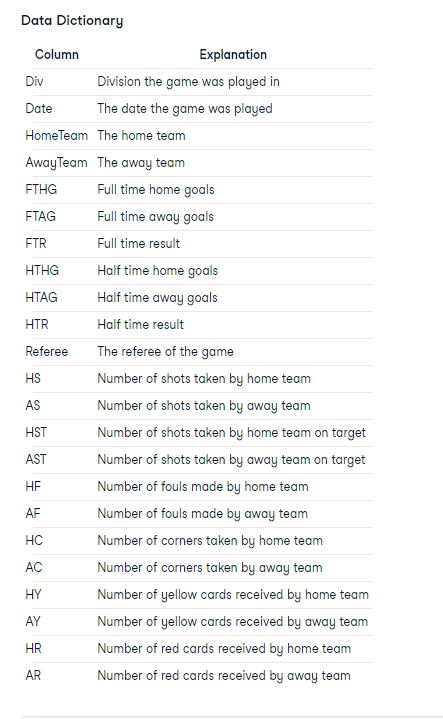

<a id="sec4"></a>
## 4 Exploring a little

So, every row represents one match, where 'HomeTeam' and 'AwayTeam' are as separate columns.


How many observed matches are in the data?

Name the teams included in Premier League season 2018-19?  
How many teams are there?

How many times each team has played as hometeam/awayteam?

How could you have calculated (mathematically) the number of matches based on the number of teams in the league?

Hints: **.unique()**, **.nunique()**, **.value_counts()**

In [44]:
df1819.shape[0]



380

**Answer**= There are 380 observed matches in the data.

In [45]:
teams = pd.unique(df1819[['HomeTeam', 'AwayTeam']].values.ravel())
print("Teams:", teams)


Teams: ['Man United' 'Leicester' 'Bournemouth' 'Cardiff' 'Fulham'
 'Crystal Palace' 'Huddersfield' 'Chelsea' 'Newcastle' 'Tottenham'
 'Watford' 'Brighton' 'Wolves' 'Everton' 'Arsenal' 'Man City' 'Liverpool'
 'West Ham' 'Southampton' 'Burnley']


In [46]:
len(teams)


20

**Answer**= There are total 20 teams in Premier League season 2018-19.

In [47]:
home_counts = df1819['HomeTeam'].value_counts()
away_counts = df1819['AwayTeam'].value_counts()

match_counts = pd.DataFrame({
    'Home Matches': home_counts,
    'Away Matches': away_counts
}).fillna(0).astype(int)

print(match_counts)




                Home Matches  Away Matches
Arsenal                   19            19
Bournemouth               19            19
Brighton                  19            19
Burnley                   19            19
Cardiff                   19            19
Chelsea                   19            19
Crystal Palace            19            19
Everton                   19            19
Fulham                    19            19
Huddersfield              19            19
Leicester                 19            19
Liverpool                 19            19
Man City                  19            19
Man United                19            19
Newcastle                 19            19
Southampton               19            19
Tottenham                 19            19
Watford                   19            19
West Ham                  19            19
Wolves                    19            19


In [48]:
n = 20
total_matches = n * (n - 1)
print(total_matches)


380


<a id="sec5"></a>
## 5 Grouping the data by team

Of course it would be interesting to find out how many goals each team has scored. The columns of interest are FTHG (full-time goals scored by the home team) and FTAG (full-time goals scored by the away team).  The method needed is "groupby"

**grouped_data=dataframe.groupby('Column to be grouped')['column to be calculated'].aggregation**

In the example-code above aggregation can be any function such as  **.mean()**, **.sum()**, **.max()**, **.min()**, depending on what you want to calculate. You can also apply multiple aggregations at once usinng **.agg(['sum', 'mean'])**

Try experimenting with this grouping-method.

If you add  **.sort_values(ascending=False)** at the end, the results will be sorted.


In [49]:
groupedA = df1819.groupby('AwayTeam')['FTAG'].sum().sort_values(ascending=False)
print("Away goals per team:\n", groupedA)








Away goals per team:
 AwayTeam
Man City          38
Liverpool         34
Tottenham         33
Crystal Palace    32
Man United        32
Arsenal           31
Leicester         27
Bournemouth       26
Watford           26
Chelsea           24
Everton           24
Burnley           21
West Ham          20
Wolves            19
Newcastle         18
Southampton       18
Brighton          16
Cardiff           13
Fulham            12
Huddersfield      12
Name: FTAG, dtype: int64


In [50]:
groupedH = df1819.groupby('HomeTeam')['FTHG'].sum().sort_values(ascending=False)
print("Home goals per team:\n", groupedH)


Home goals per team:
 HomeTeam
Man City          57
Liverpool         55
Arsenal           42
Chelsea           39
Tottenham         34
Man United        33
West Ham          32
Bournemouth       30
Everton           30
Wolves            28
Southampton       27
Watford           26
Leicester         24
Burnley           24
Newcastle         24
Fulham            22
Cardiff           21
Brighton          19
Crystal Palace    19
Huddersfield      10
Name: FTHG, dtype: int64


<a id="sec6"></a>
## 6 Histogram about goals per game

Let's start with some basic  visualisations with matplotlib for the football data.

First create a histogram of home goals using 7 bins.
Be sure to label the axes and give the figure a title.

Copy the same histogram and add the histogram of away game goals to the same figure. Remember, you can make the histograms partially transparent using the alpha parameter

What is the most common amount of goals per team per match (alias what is the mode of the variable?) ?

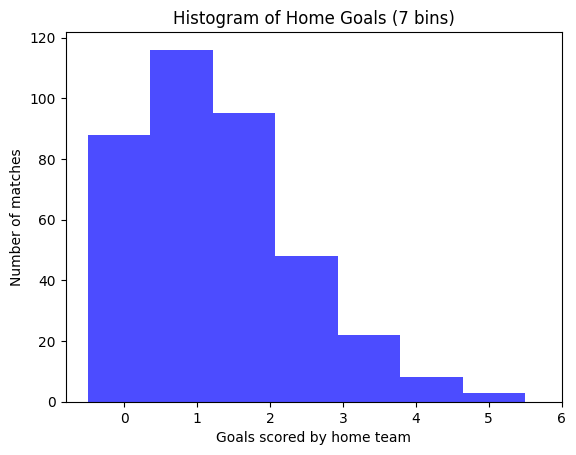

In [51]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(df1819['FTHG'], bins=7, color='blue', alpha=0.7)
plt.xlabel('Goals scored by home team')
plt.ylabel('Number of matches')
plt.title('Histogram of Home Goals (7 bins)')

positions = np.arange(0.5, 7.5, 1)
labels = np.arange(0, 7)
plt.xticks(positions, labels)

plt.show()


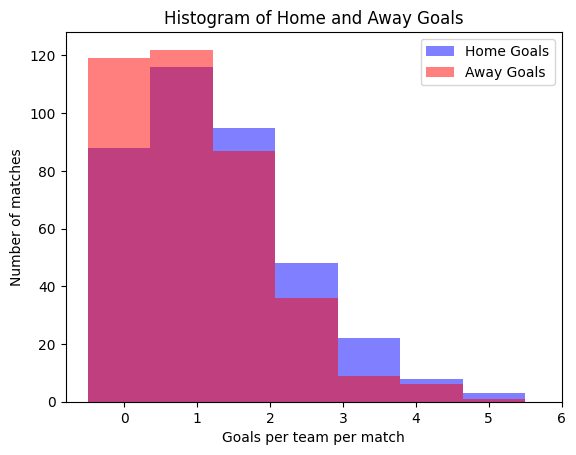

In [52]:
plt.hist(df1819['FTHG'], bins=7, color='blue', alpha=0.5, label='Home Goals')
plt.hist(df1819['FTAG'], bins=7, color='red', alpha=0.5, label='Away Goals')

plt.xlabel('Goals per team per match')
plt.ylabel('Number of matches')
plt.title('Histogram of Home and Away Goals')
plt.legend()

positions = np.arange(0.5, 7.5, 1)
labels = np.arange(0, 7)
plt.xticks(positions, labels)

plt.show()


In [53]:
home_mode = df1819['FTHG'].mode()[0]
away_mode = df1819['FTAG'].mode()[0]

print("Most common home goals per match:", home_mode)
print("Most common away goals per match:", away_mode)


Most common home goals per match: 1
Most common away goals per match: 1


<a id="sec7"></a>
## 7 Barplot about total goals per team

Earlier, you grouped the goals scored by each team. Now it would be fun to visualize the results.

Check the type of the grouped data from section 5 (**groupedA** and **groupedH**) with method .info(). Are these objects DataFrames?

In the first two lines of code, the grouped data is converted to a DataFrame so that plotting works as before.

a) Next, create a new DataFrame **df_tot** by concatenating groupedA and groupedH.

b) Add a new column called **'total'**, which is the sum of goals scored both at home and away.

c) Then, create another DataFrame df_sort, where the rows are sorted by the **'total'** column.

d) Finally, generate a horizontal (as variable **team** is categorical) bar plot that shows the total goals scored by each team, sorted in order.

Feel free to experiment with the bar plot and create a few variations—for example, using a different aggregation instead of the total (sum) of goals. Then, compare the results.

In [54]:
df_groupedA = pd.DataFrame(groupedA)
df_groupedA.columns = ['away_goals']
df_groupedA['team'] = groupedA.index

df_groupedH = pd.DataFrame(groupedH)
df_groupedH.columns = ['home_goals']
df_groupedH['team'] = groupedH.index



In [55]:
df_tot = pd.concat([df_groupedH.set_index('team'), df_groupedA.set_index('team')], axis=1)
df_tot.reset_index(inplace=True)


In [56]:
df_tot['total'] = df_tot['home_goals'] + df_tot['away_goals']


In [57]:
df_sort = df_tot.sort_values(by='total', ascending=False)


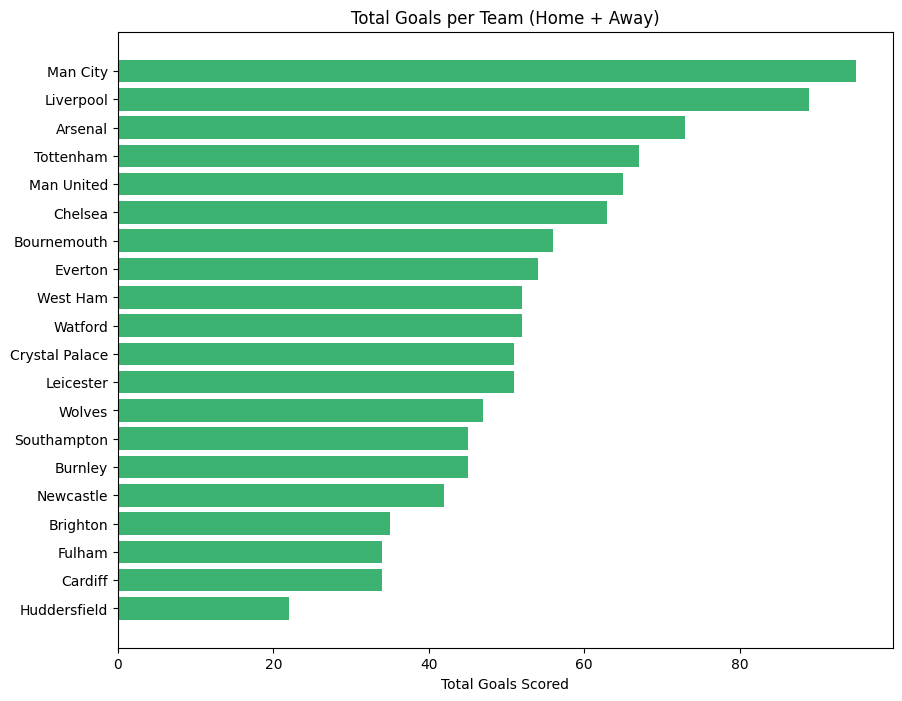

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(df_sort['team'], df_sort['total'], color='mediumseagreen')
plt.xlabel('Total Goals Scored')
plt.title('Total Goals per Team (Home + Away)')
plt.gca().invert_yaxis()
plt.show()


## 8 Stacked Barplot of Home vs Away Goals per Team


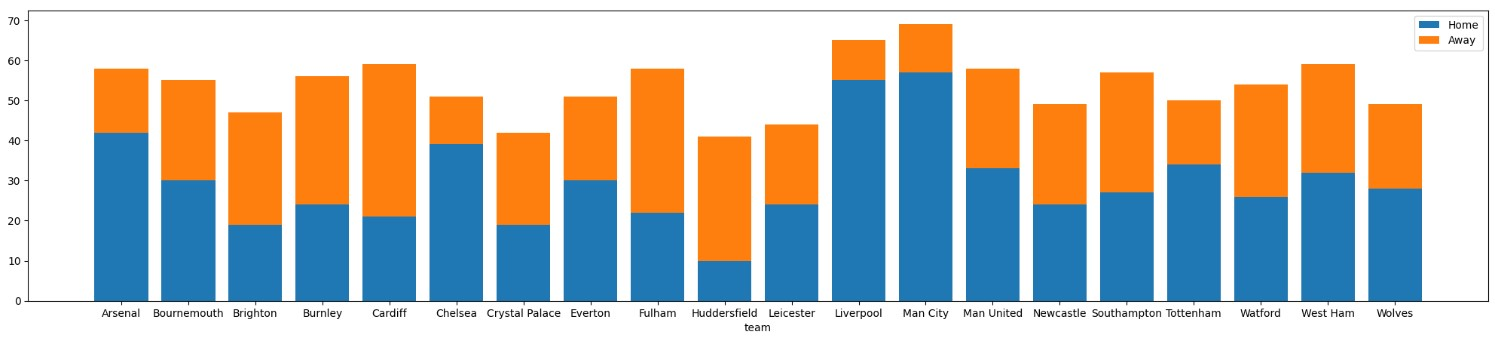



You see above a stacked bar chart. Create a similar one yourself!


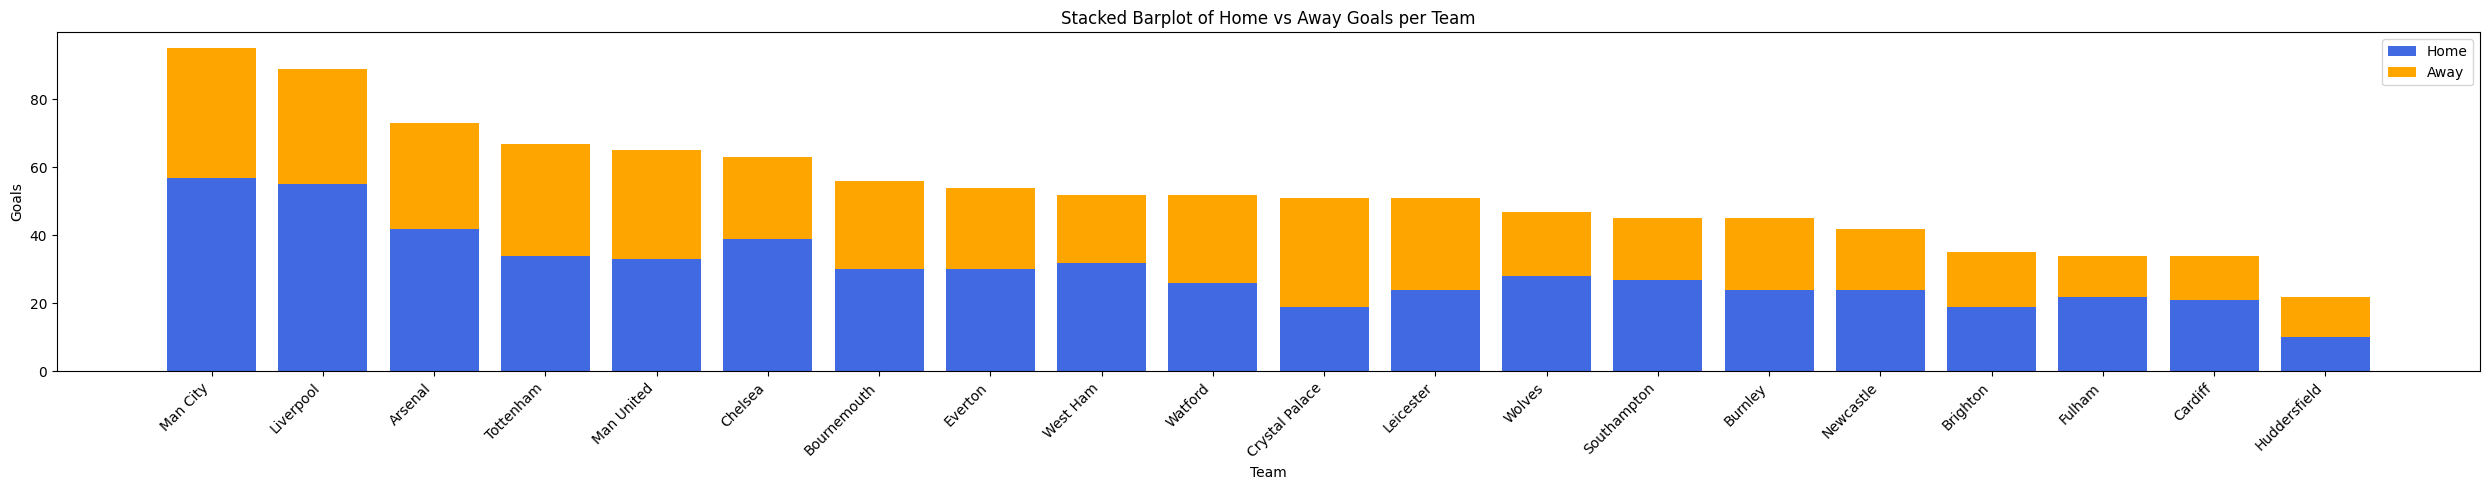

In [59]:


fig, ax = plt.subplots(figsize=(25, 5))  # Wide figure for team names

# Sort teams by total goals for better readability
df_sorted = df_tot.sort_values(by='total', ascending=False)

# Plot home goals
ax.bar(df_sorted['team'], df_sorted['home_goals'], label='Home', color='royalblue')

# Plot away goals stacked on top
ax.bar(df_sorted['team'], df_sorted['away_goals'], bottom=df_sorted['home_goals'], label='Away', color='orange')

# Customize labels and title
ax.set_xlabel('Team')
ax.set_ylabel('Goals')
ax.set_title('Stacked Barplot of Home vs Away Goals per Team')
ax.legend()

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()




## 9 Freestyling and feedback


What other interesting insights would you like to explore or discover from the data?

Please feel free to share any feedback about this assignment.

Approximately how much time did you spend on completing it?

**Answer**= I spent about 2-3 hours on this homework. It was a fantastic hands-on opportunity to practise grouping, sorting, and visualising football data. One area I'd like to investigate further is home vs. away performance, particularly how stadium size and audience support affect outcomes. It would also be fascinating to look at goal timing patterns, clean sheets, and win/loss streaks throughout the season. Overall, the task was clear, engaging, and helped students gain confidence in utilising pandas and matplotlib.